<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/ANN/Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/ANN/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y=dataset.iloc[:,13]

In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#ANN MODEL

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
from tensorflow.keras import initializers

In [16]:
model = Sequential()
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=100, activation='relu',kernel_initializer=initializers.HeUniform()))
model.add(Dense(units=50, activation='relu',kernel_initializer=initializers.GlorotUniform()))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='AdaDelta',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.20)

Epoch 1/50
168/168 [==============================] - 2s 6ms/step - loss: 0.8403 - accuracy: 0.2879 - val_loss: 0.8307 - val_accuracy: 0.3015
Epoch 2/50
168/168 [==============================] - 1s 4ms/step - loss: 0.8273 - accuracy: 0.2989 - val_loss: 0.8172 - val_accuracy: 0.3142
Epoch 3/50
168/168 [==============================] - 1s 4ms/step - loss: 0.8141 - accuracy: 0.3093 - val_loss: 0.8038 - val_accuracy: 0.3216
Epoch 4/50
168/168 [==============================] - 1s 4ms/step - loss: 0.8010 - accuracy: 0.3235 - val_loss: 0.7906 - val_accuracy: 0.3410
Epoch 5/50
168/168 [==============================] - 0s 2ms/step - loss: 0.7882 - accuracy: 0.3442 - val_loss: 0.7777 - val_accuracy: 0.3590
Epoch 6/50
168/168 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.3623 - val_loss: 0.7653 - val_accuracy: 0.3754
Epoch 7/50
168/168 [==============================] - 0s 2ms/step - loss: 0.7639 - accuracy: 0.3841 - val_loss: 0.7533 - val_accuracy: 0.3903
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


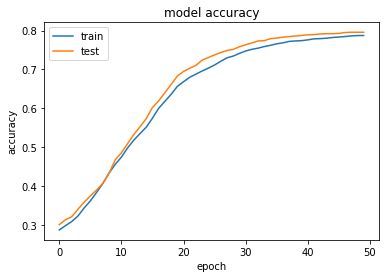

In [18]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

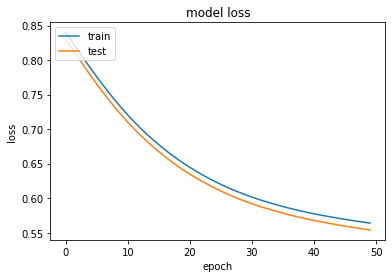

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [22]:
score

0.8021212121212121

In [23]:
model.save('model.h5')

In [24]:
keras.models.load_model('model.h5')

In [25]:
a=keras.models.load_model('model.h5')

In [26]:
for layer in model.layers: 
  print(layer.get_config(), layer.get_weights())

{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 11, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 1.56597167e-01,  2.81789266e-02,  8.61279070e-02,
        -1.39794260e-01, -3.81764144e-01,  4.93819952e-01,
         2.48723347e-02,  9.77724642e-02,  3.80050465e-02,
        -4.19488490e-01, -4.81195301e-01],
       [ 1.84805400e-03, -3.80238891e-01,  2.52080373e-02,
        -3.90566170e-01,  1.17190786e-01,  1.63243786e-01,
        -3.21254492e-01,  1.33989090e-02,  3.35598290e-01,
         1.08265594e-01,  4.03286904e-01],
       [-3.38039637e-01, -3.43234062e-01,  3.16647857e-01,
        -4.00349438e-01, -3.75316560e-01,  4.94619638e-01,
         6.27890527e-02, -1.79472119e-01,  2.06483781e-